In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Bcast operation algorithms analysis

In [7]:
file0='benchmark_0_EPYC.txt'
raw_data0 = pd.read_csv(file0, delimiter='\s+', skiprows=1, names=["Cores", "Message Size", "Average Latency (us)"])
data0 = pd.DataFrame(raw_data0)

file1='benchmark_1_EPYC.txt'
raw_data1 = pd.read_csv(file1, delimiter='\s+', skiprows=1, names=["Cores", "Message Size", "Average Latency (us)"])
data1 = pd.DataFrame(raw_data1)

file2='benchmark_2_EPYC.txt'
raw_data2 = pd.read_csv(file2, delimiter='\s+', skiprows=1, names=["Cores", "Message Size", "Average Latency (us)"])
data2 = pd.DataFrame(raw_data2)

print(data0.head())

   Cores  Message Size  Average Latency (us)
0      2             1                  0.15
1      2             2                  0.16
2      2             4                  0.15
3      2             8                  0.15
4      2            16                  0.14


In [8]:
print(data1.head())

   Cores  Message Size  Average Latency (us)
0      2             1                  0.15
1      2             2                  0.15
2      2             4                  0.15
3      2             8                  0.15
4      2            16                  0.15


### Comparison of latency scalability between algorithms by cores

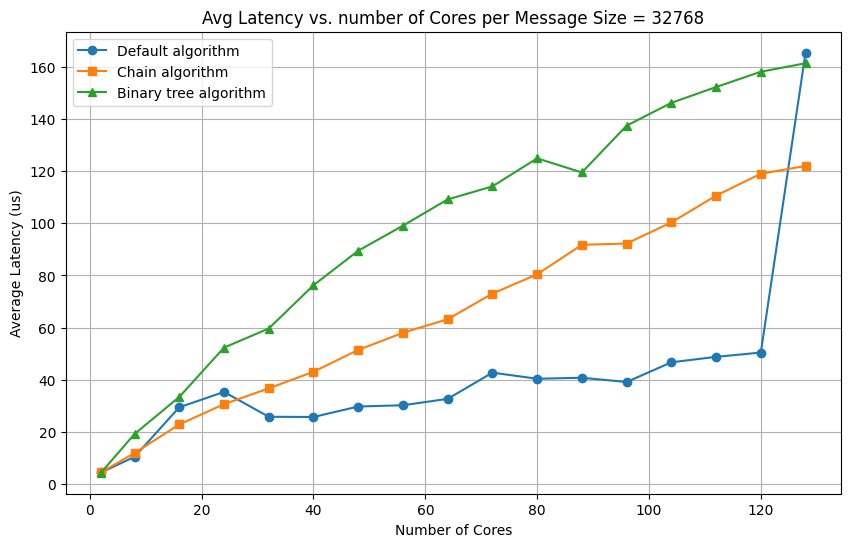

In [20]:
message_size = 32768
    
data0_filtered = data0[data0['Message Size'] == message_size]
data1_filtered = data1[data1['Message Size'] == message_size]
data2_filtered = data2[data2['Message Size'] == message_size]
    
plt.figure(figsize=(10, 6))
    

plt.plot(data0_filtered['Cores'], data0_filtered['Average Latency (us)'], marker='o', label='Default algorithm')
plt.plot(data1_filtered['Cores'], data1_filtered['Average Latency (us)'], marker='s', label='Chain algorithm')
plt.plot(data2_filtered['Cores'], data2_filtered['Average Latency (us)'], marker='^', label='Binary tree algorithm')
    

plt.xlabel('Number of Cores')
plt.ylabel('Average Latency (us)')
plt.title(f'Avg Latency vs. number of Cores per Message Size = {message_size}')
    

plt.legend()
    

plt.grid(True)
plt.show()

### Comparison between communication time for 2 cores

In [17]:
baseline_data = pd.read_csv('data_latency_epyc.csv', skiprows=1, names=['Message_size','Avg_latency','Bandwidth','Time_comm'])
baseline = pd.DataFrame(baseline_data)

print(baseline_data.head())

   Message_size  Avg_latency   Bandwidth     Time_comm
0             1     0.302381   13.974286  3.739410e-07
1             2     0.300000   28.282381  3.707154e-07
2             4     0.290952   56.087143  3.622700e-07
3             8     0.298095  115.069048  3.676187e-07
4            16     0.300476  227.084762  3.709345e-07


In [18]:
cores = 2
bandwidth = baseline['Bandwidth']
    
data0_filtered_cores = data0[data0['Cores'] == cores]
data1_filtered_cores = data1[data1['Cores'] == cores]
data2_filtered_cores = data2[data2['Cores'] == cores]

data0_filtered_cores['Bandwidth'] = bandwidth
data0_filtered_cores['Time_comm'] = (data0_filtered_cores['Average Latency (us)'] / 10**6) + (data0_filtered_cores['Message Size'] / (data0_filtered_cores['Bandwidth']*10**6))
data1_filtered_cores['Bandwidth'] = bandwidth
data1_filtered_cores['Time_comm'] = (data1_filtered_cores['Average Latency (us)'] / 10**6) + (data1_filtered_cores['Message Size'] / (data1_filtered_cores['Bandwidth']*10**6))
data2_filtered_cores['Bandwidth'] = bandwidth
data2_filtered_cores['Time_comm'] = (data2_filtered_cores['Average Latency (us)'] / 10**6) + (data2_filtered_cores['Message Size'] / (data2_filtered_cores['Bandwidth']*10**6))

C:\Users\Yasmin\AppData\Local\Temp\ipykernel_10632\1677640291.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data0_filtered_cores['Bandwidth'] = bandwidth
C:\Users\Yasmin\AppData\Local\Temp\ipykernel_10632\1677640291.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data0_filtered_cores['Time_comm'] = (data0_filtered_cores['Average Latency (us)'] / 10**6) + (data0_filtered_cores['Message Size'] / (data0_filtered_cores['Bandwidth']*10**6))
C:\Users\Yasmin\AppData\Local\Temp\ipykernel_10632\1677640291.

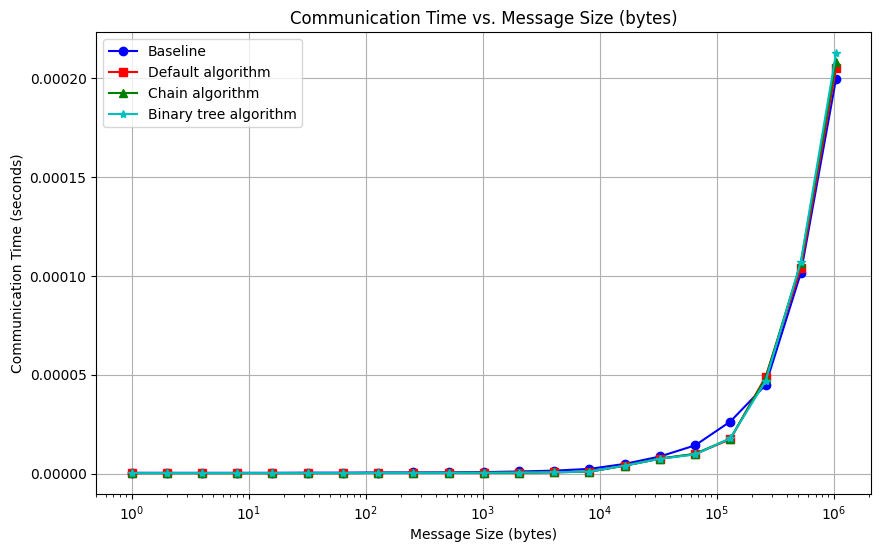

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(baseline['Message_size'], baseline['Time_comm'], marker='o', linestyle='-', color='b', label='Baseline')
plt.plot(data0_filtered_cores['Message Size'], data0_filtered_cores['Time_comm'], marker='s', linestyle='-', color='r', label='Default algorithm')
plt.plot(data1_filtered_cores['Message Size'], data1_filtered_cores['Time_comm'], marker='^', linestyle='-', color='g', label='Chain algorithm')
plt.plot(data2_filtered_cores['Message Size'], data2_filtered_cores['Time_comm'], marker='*', linestyle='-', color='c', label='Binary tree algorithm')
plt.xscale('log')
plt.xlabel('Message Size (bytes)')
plt.ylabel('Communication Time (seconds)')
plt.title('Communication Time vs. Message Size (bytes)')
plt.legend()
plt.grid(True)
plt.show()